# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

C:\Users\Chris\AppData\Local\Temp\ipykernel_27460\866361824.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


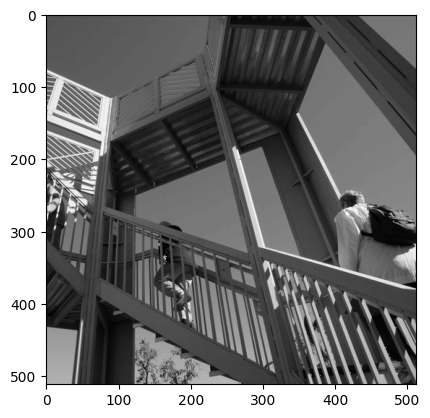

In [23]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

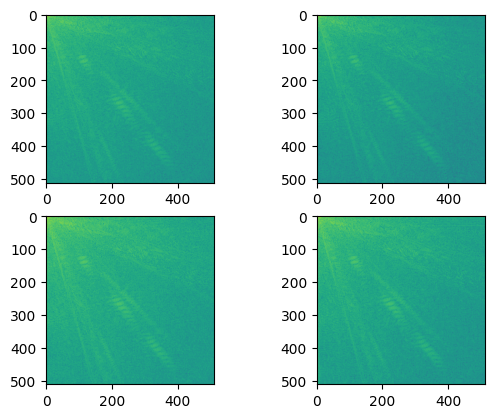

[[159.21228494  97.11062535 132.99375359 ...  71.41604343  60.9171436
   88.05966346]
 [124.36668098 130.30221684 136.34518264 ...  29.72335194  78.59355781
   47.08411396]
 [129.77138653 128.13224708 118.85612391 ...  63.0750967   80.18472542
   85.31604602]
 ...
 [ 26.77123605  78.46427275  73.52154944 ...  71.78720265  69.03050027
   77.29825263]
 [ 64.43715832  63.3014241   69.11587893 ...  63.56598457  72.47936793
   72.03846427]
 [ 70.6856001   72.59792763  71.84301639 ...  56.63250754  78.19767971
   56.39087871]]


In [10]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

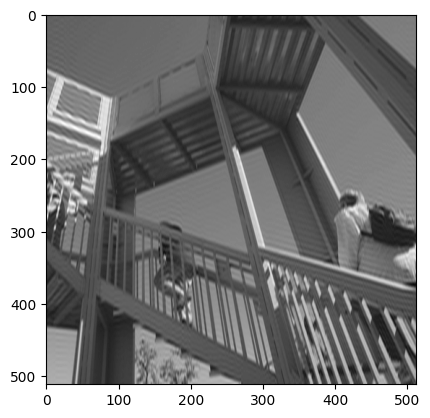

In [6]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

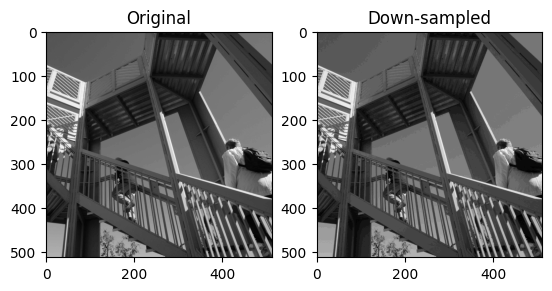

In [7]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

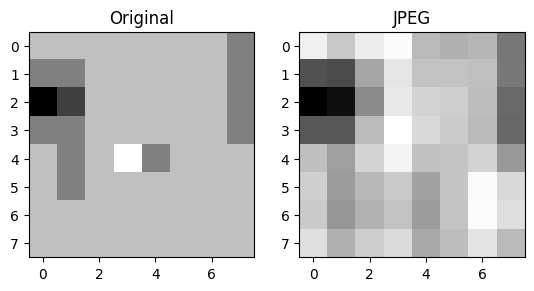

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [32]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

C:\Users\Chris\AppData\Local\Temp\ipykernel_27460\2932721355.py:2: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


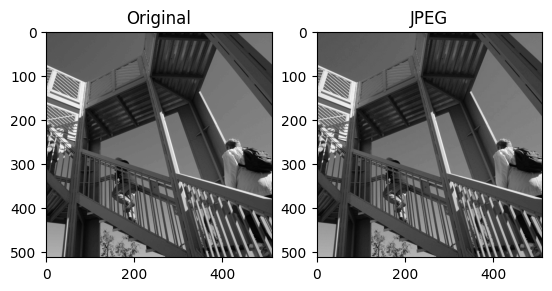

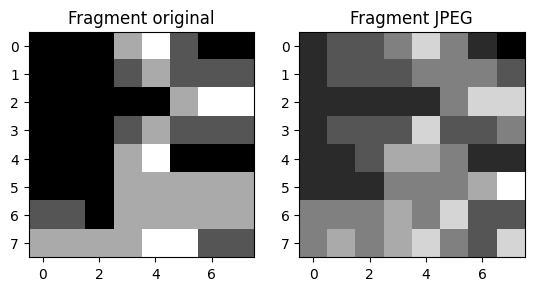

In [42]:
# Ex 1
X = misc.ascent()

Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x_rows = len(X)
x_columns = len(X[0])
x_compressed = np.zeros_like(X)

for i in range(0, x_rows, 8):
      for j in range(0, x_columns, 8):
            x = X[i:i+8:, j:j+8]
            y = dctn(x)
            y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
            x_jpeg = idctn(y_jpeg)
            x_compressed[i:i+8, j:j+8] = x_jpeg

# Results
y_nnz = np.count_nonzero(dctn(X))
y_jpeg_nnz = np.count_nonzero(x_compressed)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_compressed, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

original_fragment = X[100:108, 100:108]
compressed_fragment = x_compressed[100:108, 100:108]

plt.subplot(121).imshow(original_fragment, cmap=plt.cm.gray)
plt.title('Fragment original')
plt.subplot(122).imshow(compressed_fragment, cmap=plt.cm.gray)
plt.title('Fragment JPEG')
plt.show()


C:\Users\Chris\AppData\Local\Temp\ipykernel_27460\959425439.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face()


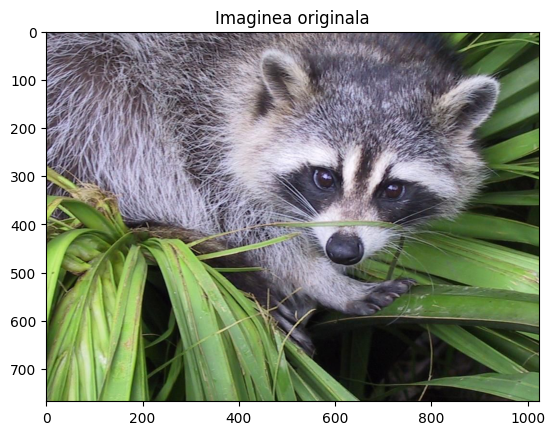

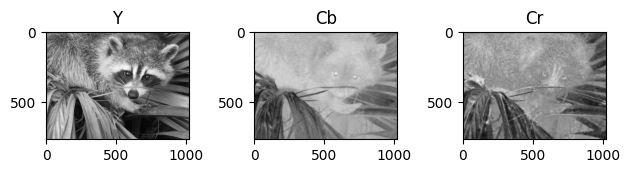

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


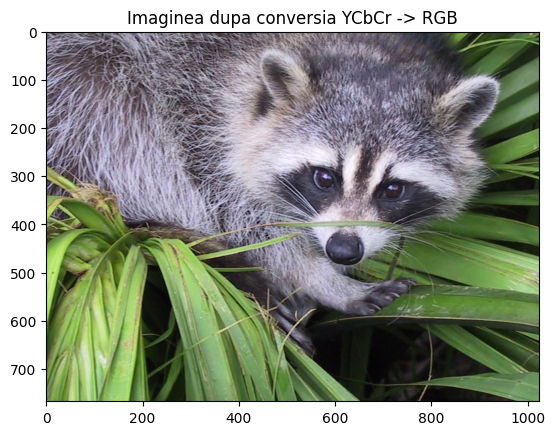

In [45]:
from skimage import color

X = misc.face()
plt.imshow(X)
plt.title("Imaginea originala")
plt.show()

X_YCBCR = color.rgb2ycbcr(X)
Y = X_YCBCR[:, :, 0]
Cb = X_YCBCR[:, :, 1]
Cr = X_YCBCR[:, :, 2]

plt.subplot(1,3,1).imshow(Y, cmap=plt.cm.gray)
plt.title("Y")
plt.subplot(1,3,2).imshow(Cb, cmap=plt.cm.gray)
plt.title("Cb")
plt.subplot(1,3,3).imshow(Cr, cmap=plt.cm.gray)
plt.title("Cr")
plt.tight_layout()
plt.show()

X_RGB = color.ycbcr2rgb(X_YCBCR)
plt.imshow(X_RGB)
plt.title("Imaginea dupa conversia YCbCr -> RGB")
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_27460\552491996.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


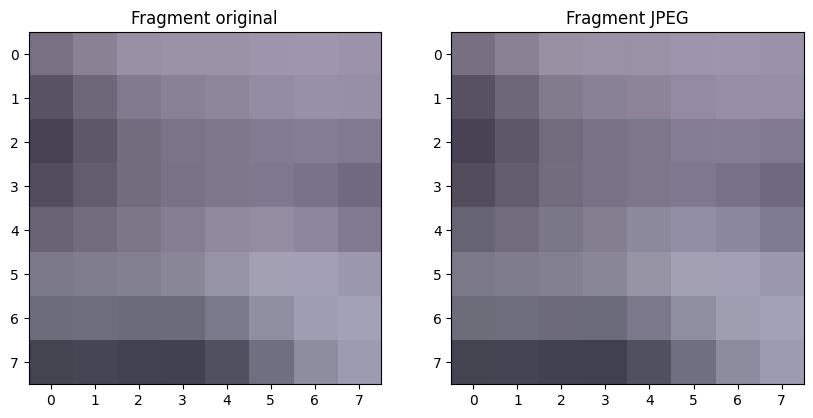

In [68]:
# Ex 2

X = misc.face()

Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
def encode_jpeg(input_image, Q_jpeg):
    x_rows = len(input_image)
    x_columns = len(input_image[0])
    image_compressed = np.zeros_like(input_image)

    for i in range(0, x_rows, 8):
        for j in range(0, x_columns, 8):
                x = input_image[i:i+8:, j:j+8]
                y = dctn(x)
                y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
                x_jpeg = idctn(y_jpeg)
                image_compressed[i:i+8, j:j+8] = x_jpeg
    return image_compressed

Y_compressed = encode_jpeg(Y, Q_jpeg)
Cb_compressed = encode_jpeg(Cb, Q_jpeg)
Cr_compressed = encode_jpeg(Cr, Q_jpeg)

X_ycbcr_compressed = np.stack([Y_compressed, Cb_compressed, Cr_compressed], axis=-1)
X_rgb_compressed = color.ycbcr2rgb(X_ycbcr_compressed)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(X)
plt.title('Original RGB')

plt.subplot(122)
plt.imshow(X_rgb_compressed)
plt.title('JPEG Compressed')

original_fragment = X[:8, :8]
compressed_fragment = X_rgb_compressed[:8, :8]

plt.subplot(121).imshow(original_fragment, cmap=plt.cm.gray)
plt.title('Fragment original')
plt.subplot(122).imshow(compressed_fragment, cmap=plt.cm.gray)
plt.title('Fragment JPEG')
plt.show()


C:\Users\Chris\AppData\Local\Temp\ipykernel_27460\253604469.py:6: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face()


Starting MSE:  3.8978628248674916e-06
Iteration: 1 | Current MSE: 3.8978628248674916e-06
Iteration: 2 | Current MSE: 0.000860867295838747
Iteration: 3 | Current MSE: 0.003334704536789259


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration: 4 | Current MSE: 0.01054284710721467
Final MSE:  0.01054284710721467


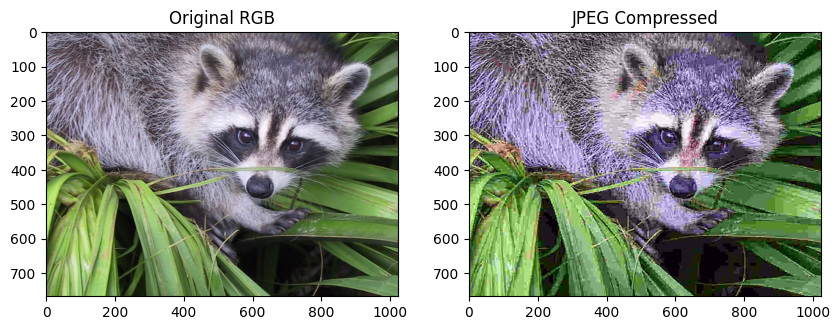

In [8]:
# Ex 3
from skimage.metrics import mean_squared_error
from skimage import color
from scipy import misc

X = misc.face()
X_YCBCR = color.rgb2ycbcr(X)
Y = X_YCBCR[:, :, 0]
Cb = X_YCBCR[:, :, 1]
Cr = X_YCBCR[:, :, 2]
X_RGB = color.ycbcr2rgb(X_YCBCR)

Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
def encode_jpeg(input_image, Q_jpeg):
    x_rows = len(input_image)
    x_columns = len(input_image[0])
    image_compressed = np.zeros_like(input_image)

    for i in range(0, x_rows, 8):
        for j in range(0, x_columns, 8):
                x = input_image[i:i+8:, j:j+8]
                y = dctn(x)
                y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
                x_jpeg = idctn(y_jpeg)
                image_compressed[i:i+8, j:j+8] = x_jpeg

    return image_compressed

target_mse = 0.01

current_mse = float('inf')
iteration = 0

# Compresam imaginea o data pentru a obtine un starting MSE

Y_compressed = encode_jpeg(Y, Q_jpeg)
Cb_compressed = encode_jpeg(Cb, Q_jpeg)
Cr_compressed = encode_jpeg(Cr, Q_jpeg)

X_ycbcr_compressed = np.stack([Y_compressed, Cb_compressed, Cr_compressed], axis=-1)
X_rgb_compressed = color.ycbcr2rgb(X_ycbcr_compressed)

starting_mse = mean_squared_error(X_RGB, X_rgb_compressed)
print("Starting MSE: ", starting_mse)
current_mse = starting_mse

while current_mse < target_mse and iteration < 100:
    Y_compressed = encode_jpeg(Y_compressed, Q_jpeg)
    Cb_compressed = encode_jpeg(Cb_compressed, Q_jpeg)
    Cr_compressed = encode_jpeg(Cr_compressed, Q_jpeg)

    X_ycbcr_compressed = np.stack([Y_compressed, Cb_compressed, Cr_compressed], axis=-1)
    X_rgb_compressed = color.ycbcr2rgb(X_ycbcr_compressed)

    current_mse = mean_squared_error(X_RGB, X_rgb_compressed)

    Q_jpeg = np.array(Q_jpeg) * np.sqrt(target_mse/current_mse)

    iteration += 1
    print("Iteration: {} | Current MSE: {}".format(iteration, current_mse))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(X_RGB)
plt.title('Original RGB')

plt.subplot(122)
plt.imshow(X_rgb_compressed)
plt.title('JPEG Compressed')

print("Final MSE: ", current_mse)


In [4]:
# Ex 4
import cv2 as cv
import numpy as np

inputVideo = cv.VideoCapture("cat_before_compression.mp4")
height = int(inputVideo.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(inputVideo.get(cv.CAP_PROP_FRAME_WIDTH))
print("H: {} W: {}".format(height, width))
outputVideo = cv.VideoWriter("cat_compressed.mp4", cv.VideoWriter_fourcc('M', 'P', '4', '2'), 30, (width, height))

Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
def encode_jpeg(input_image, Q_jpeg):
    x_rows = len(input_image)
    x_columns = len(input_image[0])
    image_compressed = np.zeros_like(input_image)

    for i in range(0, x_rows, 8):
        for j in range(0, x_columns, 8):
                x = input_image[i:i+8:, j:j+8]
                y = dctn(x)
                y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
                x_jpeg = idctn(y_jpeg)
                image_compressed[i:i+8, j:j+8] = x_jpeg

    return image_compressed

# Sursa instructiuni OpenCV https://docs.opencv.org/3.4/dd/d43/tutorial_py_video_display.html
# https://fourcc.org/codecs.php

if (inputVideo.isOpened() == False):
    print("Fisierul video nu a putut fi deschis")

while (inputVideo.isOpened()):
    ret, frame = inputVideo.read()
    if ret == True:        
        # Folosim BGR pentru ca asta e outputul cv.VideoCapture()
        (b_channel, g_channel, r_channel) = cv.split(frame)
        b_compressed = encode_jpeg(b_channel, Q_jpeg)
        g_compressed = encode_jpeg(g_channel, Q_jpeg)
        r_compressed = encode_jpeg(r_channel, Q_jpeg)

        frame_compressed = cv.merge((b_compressed, g_compressed, r_compressed))
        outputVideo.write(frame_compressed)
    else:
        break

inputVideo.release()
outputVideo.release()
cv.destroyAllWindows()

H: 480 W: 480
